# Корреляция

In [2]:
import pandas as pd
import seaborn
from matplotlib.pyplot import *

## Пример 1
Поглощение звука материалами в зависимости от их свойств (толщина, масса, жесткость и др.)

Источник данных: 
http://users.stat.ufl.edu/~winner/datasets.html


Описаные данных:

Description: Acoustic absorption coefficients of 24 woven fabrics
with different air gap distances (d=0,1,2,3,cm)

Responses: 

- acoustic0  (d=0 cm)
- acoustic1
- acoustic2
- acoustic3


Predictors:

- thickness   (mm)
- diameter    (mm)
- perforation (%)
- weight      (g/m^2)
- stiffness   (mN x cm)
- airPerm     (air permeability, mm/s) 

In [3]:
# загрузка данных из файла fabricsoundabsorb.csv 
# это текстовый файл с данными расположеными в столбцах
# header = 0 - заголовок для столбцов это нелувая (персвая посчёту строка)
# comment='#' решеткой в начале строки помечаны дополнительная, справочная, информация
# в файле, они будут проигнорированы при загрузке.

data = pd.read_csv("fabricsoundabsorb.csv", comment='#', header=0)

# данные будут загружены в переменную data

In [4]:
# напечатаем эти данные
data

,sampleID,thickness,diameter,perforation,weight,stiffness,airPerm,acoustic0,acoustic1,acoustic2,acoustic3
0,1,0.547,0.269,6.14,247,181.90,805.4,0.076,0.330,0.413,0.313
1,2,0.541,0.378,6.08,253,74.40,887.8,0.092,0.339,0.347,0.261
2,3,0.875,0.584,4.97,366,71.41,598.4,0.129,0.455,0.411,0.316
3,4,0.640,0.527,4.87,319,161.50,799.2,0.115,0.433,0.427,0.321
4,5,0.750,0.534,4.51,292,156.20,753.2,0.095,0.362,0.382,0.273
5,6,0.539,0.368,4.39,232,171.50,704.0,0.073,0.371,0.422,0.312
6,7,0.809,0.534,4.13,368,202.90,655.3,0.160,0.479,0.430,0.343
7,8,0.798,0.516,3.78,371,171.36,679.6,0.121,0.444,0.415,0.318
8,9,0.526,0.348,3.67,229,91.10,748.6,0.074,0.361,0.406,0.298
9,10,0.645,0.377,3.46,288,81.30,628.8,0.165,0.520,0.502,0.402


Загруженные данные -- это таблица.

Столбец  sampleID -- это номер образца материала. Для вычисления КК это число бесполезно, поэтому удалим столбец из таблицы.



In [13]:
data = data.drop(columns=['sampleID'])

In [14]:
# завново напечатем данные, но только первые 10 строк
data.head()

,thickness,diameter,perforation,weight,stiffness,airPerm,acoustic0,acoustic1,acoustic2,acoustic3
0,0.547,0.269,6.14,247,181.90,805.4,0.076,0.330,0.413,0.313
1,0.541,0.378,6.08,253,74.40,887.8,0.092,0.339,0.347,0.261
2,0.875,0.584,4.97,366,71.41,598.4,0.129,0.455,0.411,0.316
3,0.640,0.527,4.87,319,161.50,799.2,0.115,0.433,0.427,0.321
4,0.750,0.534,4.51,292,156.20,753.2,0.095,0.362,0.382,0.273


### Корреляционный анализ

**Корреляционный анализ** — метод обработки статистических данных, с помощью которого измеряется теснота связи между двумя или более переменными.

**Корреляционный анализ** - метод обработки статистических данных, заключающийся в изучении коэффициентов корреляции между переменными. 

Вычислим и выведем коэффициенты корреляции для каждого столбца таблицы с каждым.
Нижеприведенная таблица называется **матрицей корреляции**.

In [16]:
data.corr()

,thickness,diameter,perforation,weight,stiffness,airPerm,acoustic0,acoustic1,acoustic2,acoustic3
thickness,1.000000,0.457714,-0.396989,0.789977,0.217681,-0.481234,0.601599,0.613085,0.312926,0.325604
diameter,0.457714,1.000000,0.262532,0.766669,0.383282,0.149979,0.163440,-0.037185,-0.342026,-0.364418
perforation,-0.396989,0.262532,1.000000,0.011410,0.141421,0.858963,-0.292417,-0.809441,-0.855756,-0.827111
weight,0.789977,0.766669,0.011410,1.000000,0.483325,-0.087659,0.478649,0.298981,-0.088102,-0.058859
stiffness,0.217681,0.383282,0.141421,0.483325,1.000000,0.103397,-0.019329,-0.082112,-0.193223,-0.208397
airPerm,-0.481234,0.149979,0.858963,-0.087659,0.103397,1.000000,-0.335918,-0.851782,-0.866430,-0.853823
acoustic0,0.601599,0.163440,-0.292417,0.478649,-0.019329,-0.335918,1.000000,0.709170,0.402691,0.492771
acoustic1,0.613085,-0.037185,-0.809441,0.298981,-0.082112,-0.851782,0.709170,1.000000,0.879278,0.901899
acoustic2,0.312926,-0.342026,-0.855756,-0.088102,-0.193223,-0.866430,0.402691,0.879278,1.000000,0.989045
acoustic3,0.325604,-0.364418,-0.827111,-0.058859,-0.208397,-0.853823,0.492771,0.901899,0.989045,1.000000


Рассмотрим например корреляцию между коэф. поглощения звука (acoustic1) и толщиной материала (thickness): пересечение строки thickness и столбца acoustic1, КК  0.613085.

- Коэффициент корреляции отличается от нуля, значит существует зависимость между поглощением звука и толщиной материала. 
- КК положителен, значит эта зависимость прямая
- Далее будем обозначать КК буквой **r**.


Аналогичным способом можно делать и выводы о кореляции других величин друг от друга.

Однако можно представить матрицу корреляции и нагляднее. Построим тепловую карту, обозначив величину КК цветом.

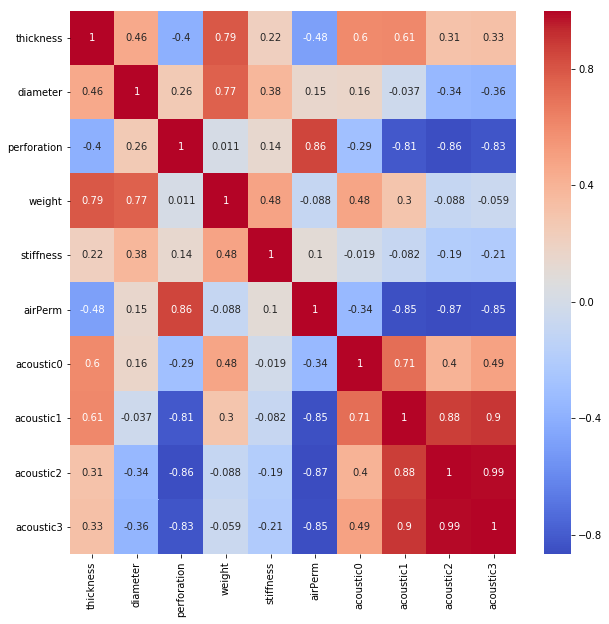

In [18]:
figure( figsize=(10,10))  # размер графика - 10х10 едениц
seaborn.heatmap( data.corr(),
                cmap='coolwarm',  # способ цветового кодирования: холодные и тёплые цвета
                annot=True)  # annot=True - показывать не только цвета, но и величну КК

Теперь рассмотрим корреляцию между толщиной материала и кэф. звукопоглощения отдельно.

Построим диаграмму рассеивания. Точки на этой диаграмме - это отдельные измерения соответствующих величин.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


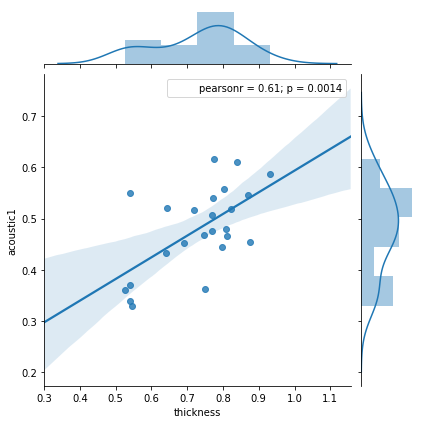

In [22]:
seaborn.jointplot(data=data,  # используемые данные
                  x="thickness", y='acoustic1', # какой столбец по какой оси озобразить
                  kind='reg')  # reg - изобразить линию регрессии

- Точки на графики - это пары значений (thickness и acoustic1)
- Каздая пара значений взята из одной строчки таблицы data. Одна строка таблицы - это одно испытание на звукопоглощение.
- На графике видно, что большинство значений грубо подходят под проведённую линию. 
- Эта линия называется **линией регресии**
- Чем ближе КК к 1 или -1, тем больше точек лежит на линии регрессии

#### Гипотеза о равенстве КК нулю

- Однако, эксперементальные данные - это всего лишь выборка, потому, что исслудуется только небольшая часть из всех материалов. Поэтому есть шанс, что полученная зависимость между исследуемыми величинами случайна.

- Требуется убедится, что зависимость есть не только в выборке но и в генеральной совокупности.

- Про построении графика зааодно проверятеся гипотеза (нулевая гипотеза) о равенсве КК нулю. 
    - $H_0: r = 0$

- Если это равенство подтвердится, значит полученное значение КК получилось именно таким случайно. 

- Для проверки гипотезы вычислется p-value. Правило для принятия нулевой гипотезы: 
    - p-value > 0.05 - нулевая гипотеза принимается.
    - p-value < 0.05 - нулевая гипотеза отвергается.



В примере выше: p-value = 0.0014 < 0.05.
Отвергаем нулевую гипотезу о равенстве КК нулю. КК статистически значим. Поэтому будм считать, что такое же значение КК справделиво и для выборки.


***
Для примера построим ещё и диаграмму рассеивания для величин поглощение звука (acoustic1) и жёсткость (stiffness)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


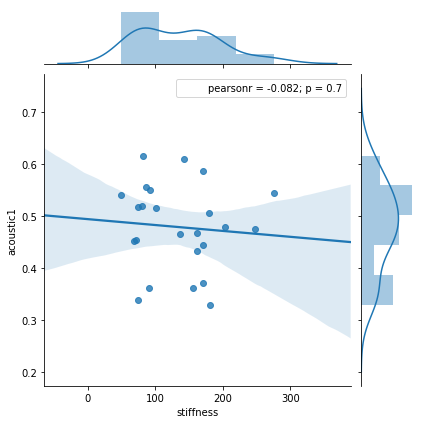

In [5]:
seaborn.jointplot(data=data, x="stiffness", y="acoustic1", kind='reg')

- Здесь точки разбросаны более хаотино, трудно провести линию ругрессии, которая подходила бы большинству точек.
- Поэтому и КК близок к нулю.
- Значит здесь нет заметной статистической зависимости
- Это подтверждается проверкой гипотезы о равенстве КК нулю: p-value > 0.05. Значит нет отснований отклонить нулевую гипотезу $H_0: r=0$

# Пример 2

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

---------------------------------

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (доменный шлак, component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (Летучая зола, component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (вода, component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (заполнитель, component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (мелкий заполнитель, component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age (время отведённое на завтердевание) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength (прочность на сжатие) -- quantitative -- MPa -- Output Variable 

---------------------------------

Acknowledgements, Copyright Information, and Availability:

NOTE: Reuse of this database is unlimited with retention of copyright notice for 
Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial 
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)





In [11]:
data2 = pd.read_csv("Concrete_Data.csv", header=0, comment='#', delimiter=';')
# здесь один столбец отделён от другого точкой с запятой (;), а не запятой, 
# поэтому чтобы данные загрузились корректно, укажм разделитель: delimiter=';'

In [14]:
# названия столбцов очень длинные, поэтому заменим на короткие
cols = data2.columns.values
cols[0] = "component1"
cols[1] = "component2"
cols[2] = "component3"
cols[3] = "component4"
cols[4] = "component5"
cols[5] = "component6"
cols[6] = "component7"
cols[7] = "age"
cols[8] = "strength"
data2.columns = cols

In [15]:
# удалим последний столбец, он без данных
data2 = data2.drop(columns=['Unnamed: 9'])

In [16]:
data2.head()

,component1,component2,component3,component4,component5,component6,component7,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [79]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
component1    1030 non-null float64
component2    1030 non-null float64
component3    1030 non-null float64
component4    1030 non-null float64
component5    1030 non-null float64
component6    1030 non-null float64
component7    1030 non-null float64
age           1030 non-null int64
strength      1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


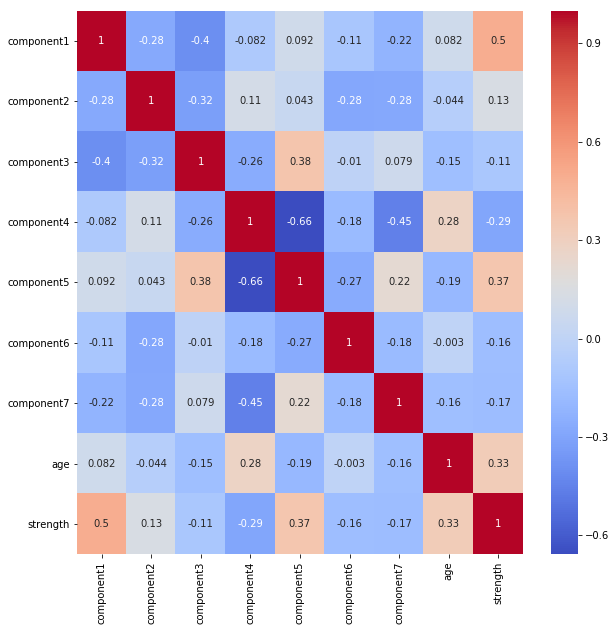

In [80]:
figure( figsize=(10,10) )
seaborn.heatmap( data2.corr(), cmap='coolwarm', annot = True )

- Какие части бетонной смеси сильнее всего влияет на его прочность после застывания?
- Где зависимость прямая, а где обратная?
- Есть ли компоненты смеси, которы влияют на прочность слабо?
- Как влияет время застывания смеси на прочность бетона?
- Как влияет количество воды в смеси на время застывания?

## Регрессионный анализ
- найти функцию, которая отображает зависимость одних переменных или данных от других
    - Y = f(x_1, x_2, ..., x_3)
- функция строится на основе известных значений переменных
- Регрессия полезна для прогнозирования ответа на новые условия

In [19]:
# подключение модуля для использования линейной регрессии
from sklearn.linear_model import LinearRegression

# создание переменной, через которую будет происходить работа с линейной регрессией: строится уравнение, 
# предсказыватся значения

reg = LinearRegression()

# Построение уравнения линейной регресии по имеющимся данным:
# Y - strength -- прочность бетона (столбец strength)
# X - data2[data2.columns[:-1]] - все остальные столбцы, кроме последнего (-1)
reg.fit(data2[data2.columns[:-1]],  data2.strength)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# коэффициенты ai уравнения линейной регрессии (кроме a0)
# Y = x1 * a1 + x2 * a2 + ...
reg.coef_

array([ 0.11980433,  0.10386581,  0.08793432, -0.14991842,  0.2922246 ,
        0.01808621,  0.02019035,  0.11422207])

Чило коэффицентов соответсвутет числу независимых переменных (иксов). Здесь X - это переменные представленные в столбцах component1, component2, 

In [21]:
# коэффицент a0
reg.intercept_

-23.331213584903367

In [36]:
reg.predict( [data2.loc[ 2 , data2.columns[:-1] ]] )

array([56.81258504])

In [39]:
reg.score( data2[data2.columns[:-1]],  data2.strength )

0.6155198704142721